## `1. Importing Libraries`

In [125]:
# %load_ext cudf.pandas
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import RobustScaler, StandardScaler
from imblearn.over_sampling import SMOTE

from scipy.stats.mstats import winsorize

## `2. Importing Datasets`

In [236]:
train_data_1 = pd.read_csv('/kaggle/input/playground-series-s5e3/train.csv').drop(columns = ['id'])
train_data_2 = pd.read_csv('/kaggle/input/rainfall-prediction-using-machine-learning/Rainfall.csv')
test_data = pd.read_csv('/kaggle/input/playground-series-s5e3/test.csv')

In [237]:
print("train_data_1 columns:", train_data_1.columns.tolist())
print("train_data_2 columns:", train_data_2.columns.tolist())

train_data_1 columns: ['day', 'pressure', 'maxtemp', 'temparature', 'mintemp', 'dewpoint', 'humidity', 'cloud', 'sunshine', 'winddirection', 'windspeed', 'rainfall']
train_data_2 columns: ['day', 'pressure ', 'maxtemp', 'temparature', 'mintemp', 'dewpoint', 'humidity ', 'cloud ', 'rainfall', 'sunshine', '         winddirection', 'windspeed']


In [238]:
train_data_1.columns = train_data_1.columns.str.strip()
train_data_2.columns = train_data_2.columns.str.strip()

In [239]:
train_data_2 = train_data_2[train_data_1.columns]

In [240]:
train_data_1.head()

day  pressure  maxtemp  temparature  mintemp  dewpoint  humidity  cloud  \
0    1    1017.4     21.2         20.6     19.9      19.4      87.0   88.0   
1    2    1019.5     16.2         16.9     15.8      15.4      95.0   91.0   
2    3    1024.1     19.4         16.1     14.6       9.3      75.0   47.0   
3    4    1013.4     18.1         17.8     16.9      16.8      95.0   95.0   
4    5    1021.8     21.3         18.4     15.2       9.6      52.0   45.0   

   sunshine  winddirection  windspeed  rainfall  
0       1.1           60.0       17.2         1  
1       0.0           50.0       21.9         1  
2       8.3           70.0       18.1         1  
3       0.0           60.0       35.6         1  
4       3.6           40.0       24.8         0

In [241]:
train_data_2.head()

day  pressure  maxtemp  temparature  mintemp  dewpoint  humidity  cloud  \
0    1    1025.9     19.9         18.3     16.8      13.1        72     49   
1    2    1022.0     21.7         18.9     17.2      15.6        81     83   
2    3    1019.7     20.3         19.3     18.0      18.4        95     91   
3    4    1018.9     22.3         20.6     19.1      18.8        90     88   
4    5    1015.9     21.3         20.7     20.2      19.9        95     81   

   sunshine  winddirection  windspeed rainfall  
0       9.3           80.0       26.3      yes  
1       0.6           50.0       15.3      yes  
2       0.0           40.0       14.2      yes  
3       1.0           50.0       16.9      yes  
4       0.0           40.0       13.7      yes

In [242]:
train_data_2['rainfall'] = train_data_2['rainfall'].map({'yes': 1, 'no': 0})

In [243]:
train_data_2.head()

day  pressure  maxtemp  temparature  mintemp  dewpoint  humidity  cloud  \
0    1    1025.9     19.9         18.3     16.8      13.1        72     49   
1    2    1022.0     21.7         18.9     17.2      15.6        81     83   
2    3    1019.7     20.3         19.3     18.0      18.4        95     91   
3    4    1018.9     22.3         20.6     19.1      18.8        90     88   
4    5    1015.9     21.3         20.7     20.2      19.9        95     81   

   sunshine  winddirection  windspeed  rainfall  
0       9.3           80.0       26.3         1  
1       0.6           50.0       15.3         1  
2       0.0           40.0       14.2         1  
3       1.0           50.0       16.9         1  
4       0.0           40.0       13.7         1

In [244]:
print(train_data_1.shape)
print(train_data_2.shape)

(2190, 12)
(366, 12)


In [245]:
train_data = pd.concat([train_data_1, train_data_2], axis = 0, ignore_index = True)
print(train_data.shape)
train_data.head()

(2556, 12)


day  pressure  maxtemp  temparature  mintemp  dewpoint  humidity  cloud  \
0    1    1017.4     21.2         20.6     19.9      19.4      87.0   88.0   
1    2    1019.5     16.2         16.9     15.8      15.4      95.0   91.0   
2    3    1024.1     19.4         16.1     14.6       9.3      75.0   47.0   
3    4    1013.4     18.1         17.8     16.9      16.8      95.0   95.0   
4    5    1021.8     21.3         18.4     15.2       9.6      52.0   45.0   

   sunshine  winddirection  windspeed  rainfall  
0       1.1           60.0       17.2         1  
1       0.0           50.0       21.9         1  
2       8.3           70.0       18.1         1  
3       0.0           60.0       35.6         1  
4       3.6           40.0       24.8         0

In [246]:
train_data.head()

day  pressure  maxtemp  temparature  mintemp  dewpoint  humidity  cloud  \
0    1    1017.4     21.2         20.6     19.9      19.4      87.0   88.0   
1    2    1019.5     16.2         16.9     15.8      15.4      95.0   91.0   
2    3    1024.1     19.4         16.1     14.6       9.3      75.0   47.0   
3    4    1013.4     18.1         17.8     16.9      16.8      95.0   95.0   
4    5    1021.8     21.3         18.4     15.2       9.6      52.0   45.0   

   sunshine  winddirection  windspeed  rainfall  
0       1.1           60.0       17.2         1  
1       0.0           50.0       21.9         1  
2       8.3           70.0       18.1         1  
3       0.0           60.0       35.6         1  
4       3.6           40.0       24.8         0

In [247]:
test_data.head()

id  day  pressure  maxtemp  temparature  mintemp  dewpoint  humidity  \
0  2190    1    1019.5     17.5         15.8     12.7      14.9      96.0   
1  2191    2    1016.5     17.5         16.5     15.8      15.1      97.0   
2  2192    3    1023.9     11.2         10.4      9.4       8.9      86.0   
3  2193    4    1022.9     20.6         17.3     15.2       9.5      75.0   
4  2194    5    1022.2     16.1         13.8      6.4       4.3      68.0   

   cloud  sunshine  winddirection  windspeed  
0   99.0       0.0           50.0       24.3  
1   99.0       0.0           50.0       35.3  
2   96.0       0.0           40.0       16.9  
3   45.0       7.1           20.0       50.6  
4   49.0       9.2           20.0       19.4

In [248]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2556 entries, 0 to 2555
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   day            2556 non-null   int64  
 1   pressure       2556 non-null   float64
 2   maxtemp        2556 non-null   float64
 3   temparature    2556 non-null   float64
 4   mintemp        2556 non-null   float64
 5   dewpoint       2556 non-null   float64
 6   humidity       2556 non-null   float64
 7   cloud          2556 non-null   float64
 8   sunshine       2556 non-null   float64
 9   winddirection  2555 non-null   float64
 10  windspeed      2555 non-null   float64
 11  rainfall       2556 non-null   int64  
dtypes: float64(10), int64(2)
memory usage: 239.8 KB


In [249]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             730 non-null    int64  
 1   day            730 non-null    int64  
 2   pressure       730 non-null    float64
 3   maxtemp        730 non-null    float64
 4   temparature    730 non-null    float64
 5   mintemp        730 non-null    float64
 6   dewpoint       730 non-null    float64
 7   humidity       730 non-null    float64
 8   cloud          730 non-null    float64
 9   sunshine       730 non-null    float64
 10  winddirection  729 non-null    float64
 11  windspeed      730 non-null    float64
dtypes: float64(10), int64(2)
memory usage: 68.6 KB


## `3. Data Preprocessing`

### 3.1 `Handling Null Values`

In [250]:
train_data.isnull().sum()

day              0
pressure         0
maxtemp          0
temparature      0
mintemp          0
dewpoint         0
humidity         0
cloud            0
sunshine         0
winddirection    1
windspeed        1
rainfall         0
dtype: int64

In [251]:
train_data = train_data.fillna(train_data.mean())
train_data.isnull().sum()

day              0
pressure         0
maxtemp          0
temparature      0
mintemp          0
dewpoint         0
humidity         0
cloud            0
sunshine         0
winddirection    0
windspeed        0
rainfall         0
dtype: int64

In [252]:
test_data.isnull().sum()

id               0
day              0
pressure         0
maxtemp          0
temparature      0
mintemp          0
dewpoint         0
humidity         0
cloud            0
sunshine         0
winddirection    1
windspeed        0
dtype: int64

In [253]:
test_data = test_data.fillna(test_data.mean())
test_data.isnull().sum()

id               0
day              0
pressure         0
maxtemp          0
temparature      0
mintemp          0
dewpoint         0
humidity         0
cloud            0
sunshine         0
winddirection    0
windspeed        0
dtype: int64

### 3.1 `Data Visualization`

#### Target Feature Distribution

In [254]:
print(train_data['rainfall'].unique()) 

[1 0]


In [255]:
train_data['rainfall'] = train_data['rainfall'].map({0: 'No', 1: 'Yes'})
train_data["rainfall"] = train_data["rainfall"].astype(str)

In [256]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2556 entries, 0 to 2555
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   day            2556 non-null   int64  
 1   pressure       2556 non-null   float64
 2   maxtemp        2556 non-null   float64
 3   temparature    2556 non-null   float64
 4   mintemp        2556 non-null   float64
 5   dewpoint       2556 non-null   float64
 6   humidity       2556 non-null   float64
 7   cloud          2556 non-null   float64
 8   sunshine       2556 non-null   float64
 9   winddirection  2556 non-null   float64
 10  windspeed      2556 non-null   float64
 11  rainfall       2556 non-null   object 
dtypes: float64(10), int64(1), object(1)
memory usage: 239.8+ KB


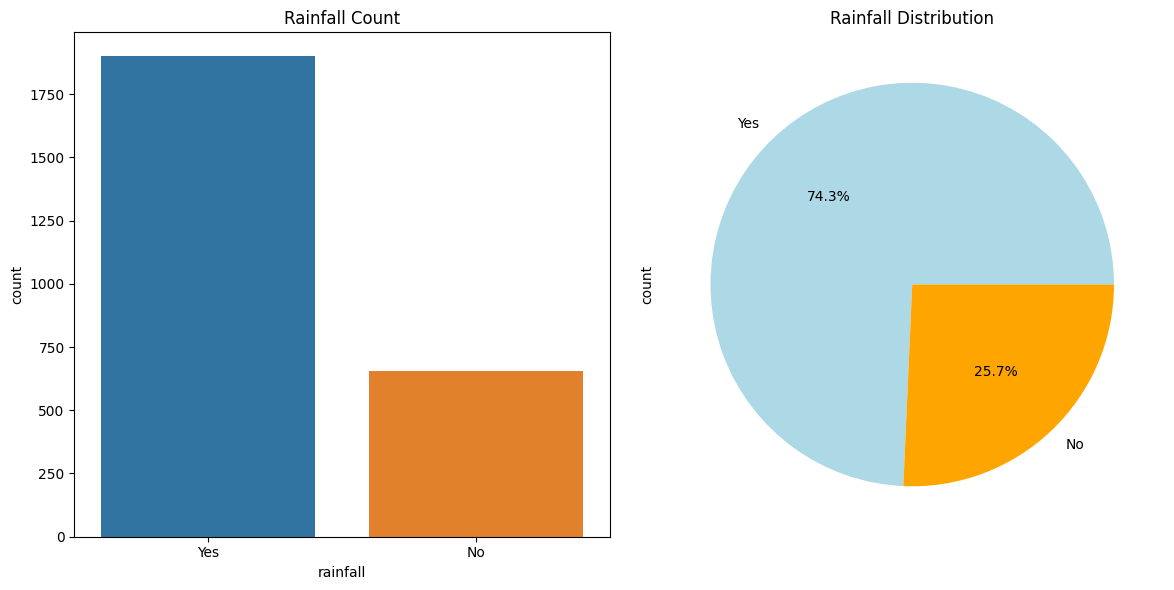

In [257]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

sns.countplot(x=train_data['rainfall'], ax=ax[0])
ax[0].set_title("Rainfall Count")
train_data['rainfall'].value_counts().plot.pie(autopct='%1.1f%%', colors=['lightblue', 'orange'], ax=ax[1])
ax[1].set_title("Rainfall Distribution")

plt.tight_layout()
plt.show()

#### Bivariate Analysis

Index(['day', 'pressure', 'maxtemp', 'temparature', 'mintemp', 'dewpoint',
       'humidity', 'cloud', 'sunshine', 'winddirection', 'windspeed'],
      dtype='object')


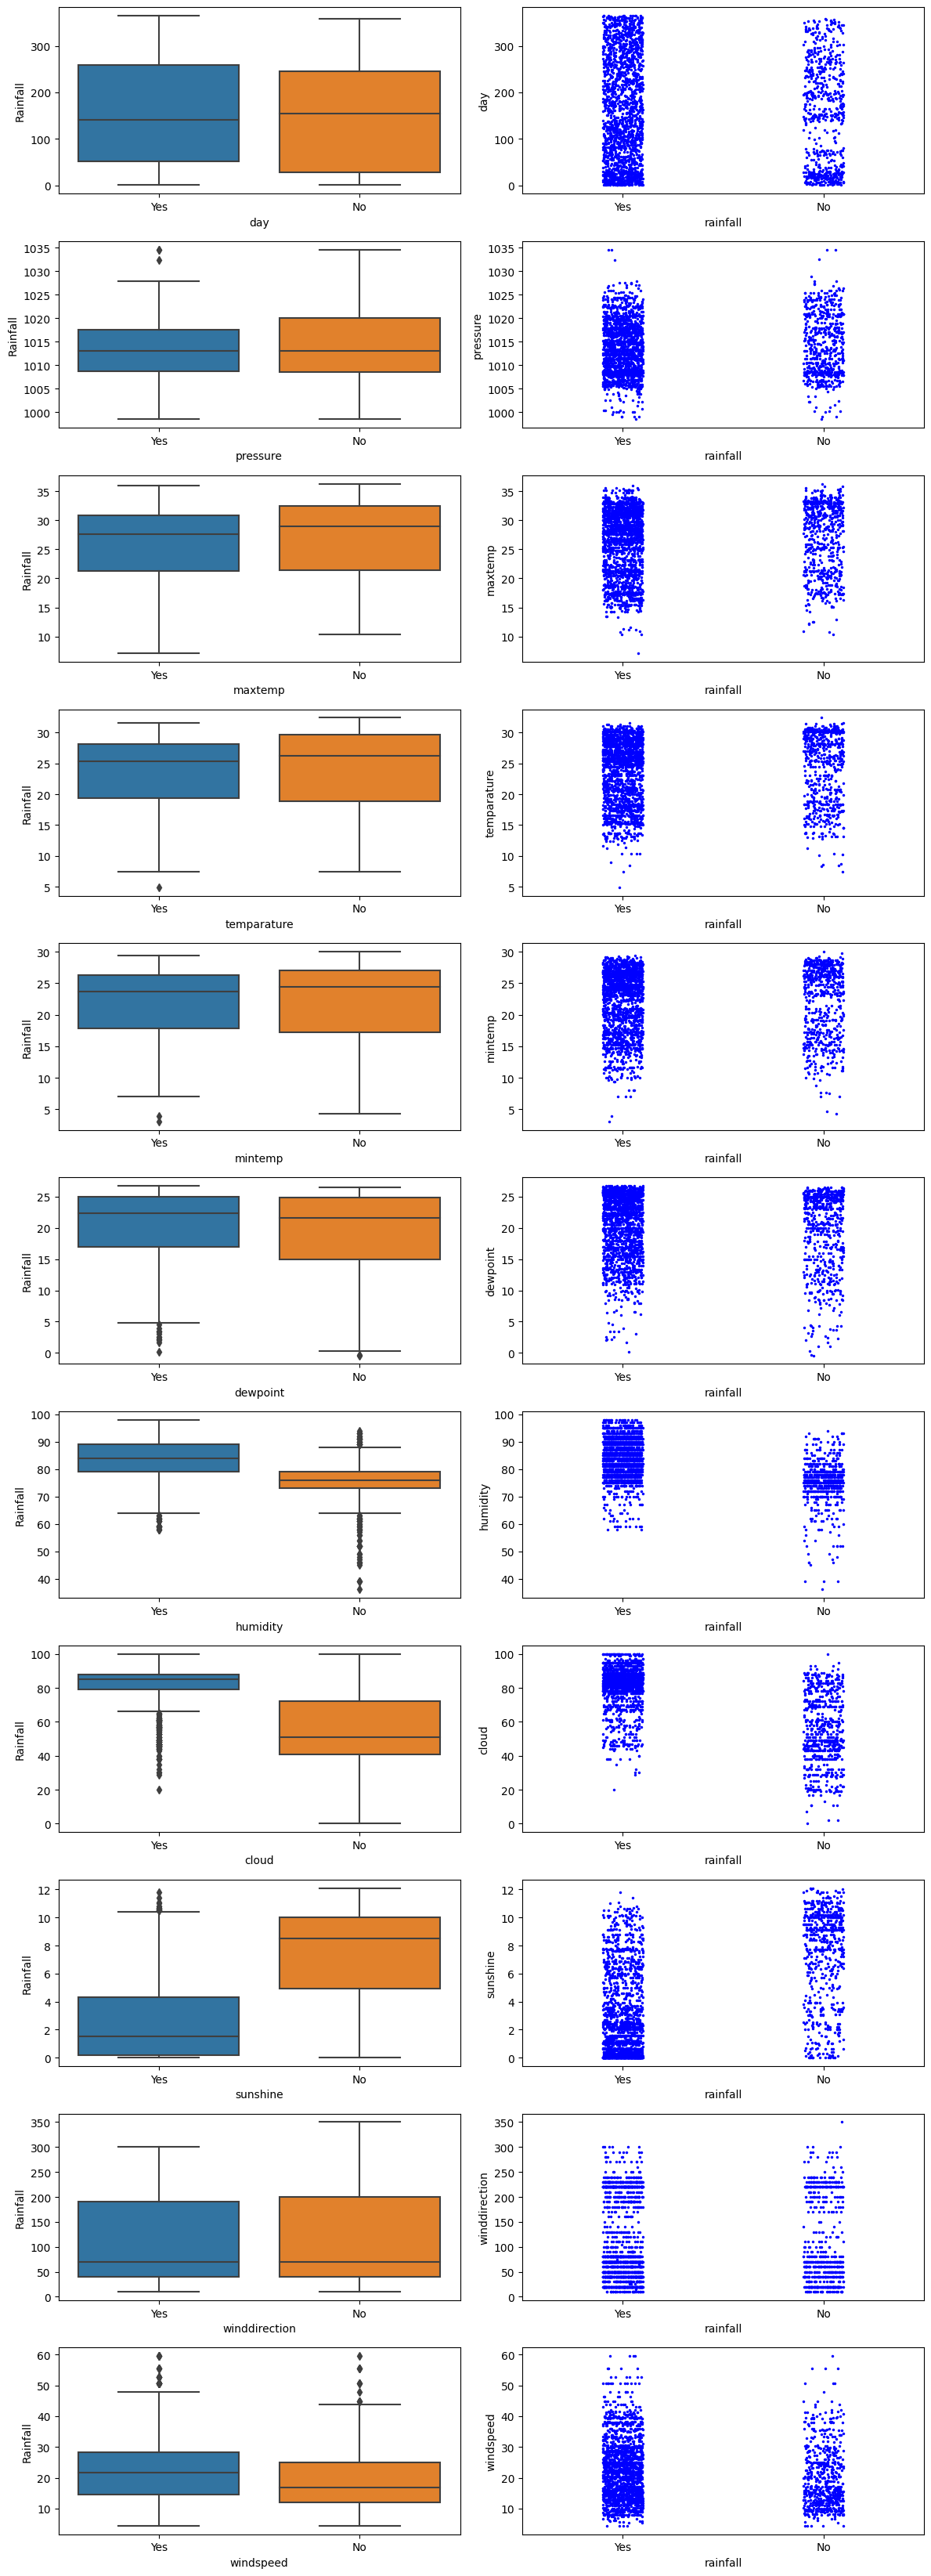

In [258]:
num_features = train_data.drop(columns = ['rainfall']).columns
print(num_features)

fig, axes = plt.subplots(nrows=len(num_features), ncols=2, figsize=(12, 3 * len(num_features)))

# Plot each feature against rainfall
for i, feature in enumerate(num_features):
    if feature != "rainfall":
        sns.boxplot(x = 'rainfall', y = train_data[feature], data = train_data, ax = axes[i,0])
        sns.stripplot(x="rainfall", y=train_data[feature], data=train_data, ax=axes[i,1], jitter=True, marker = '.', color = 'blue')
        axes[i,0].set_xlabel(feature)
        axes[i,0].set_ylabel("Rainfall")

plt.tight_layout()
plt.show()

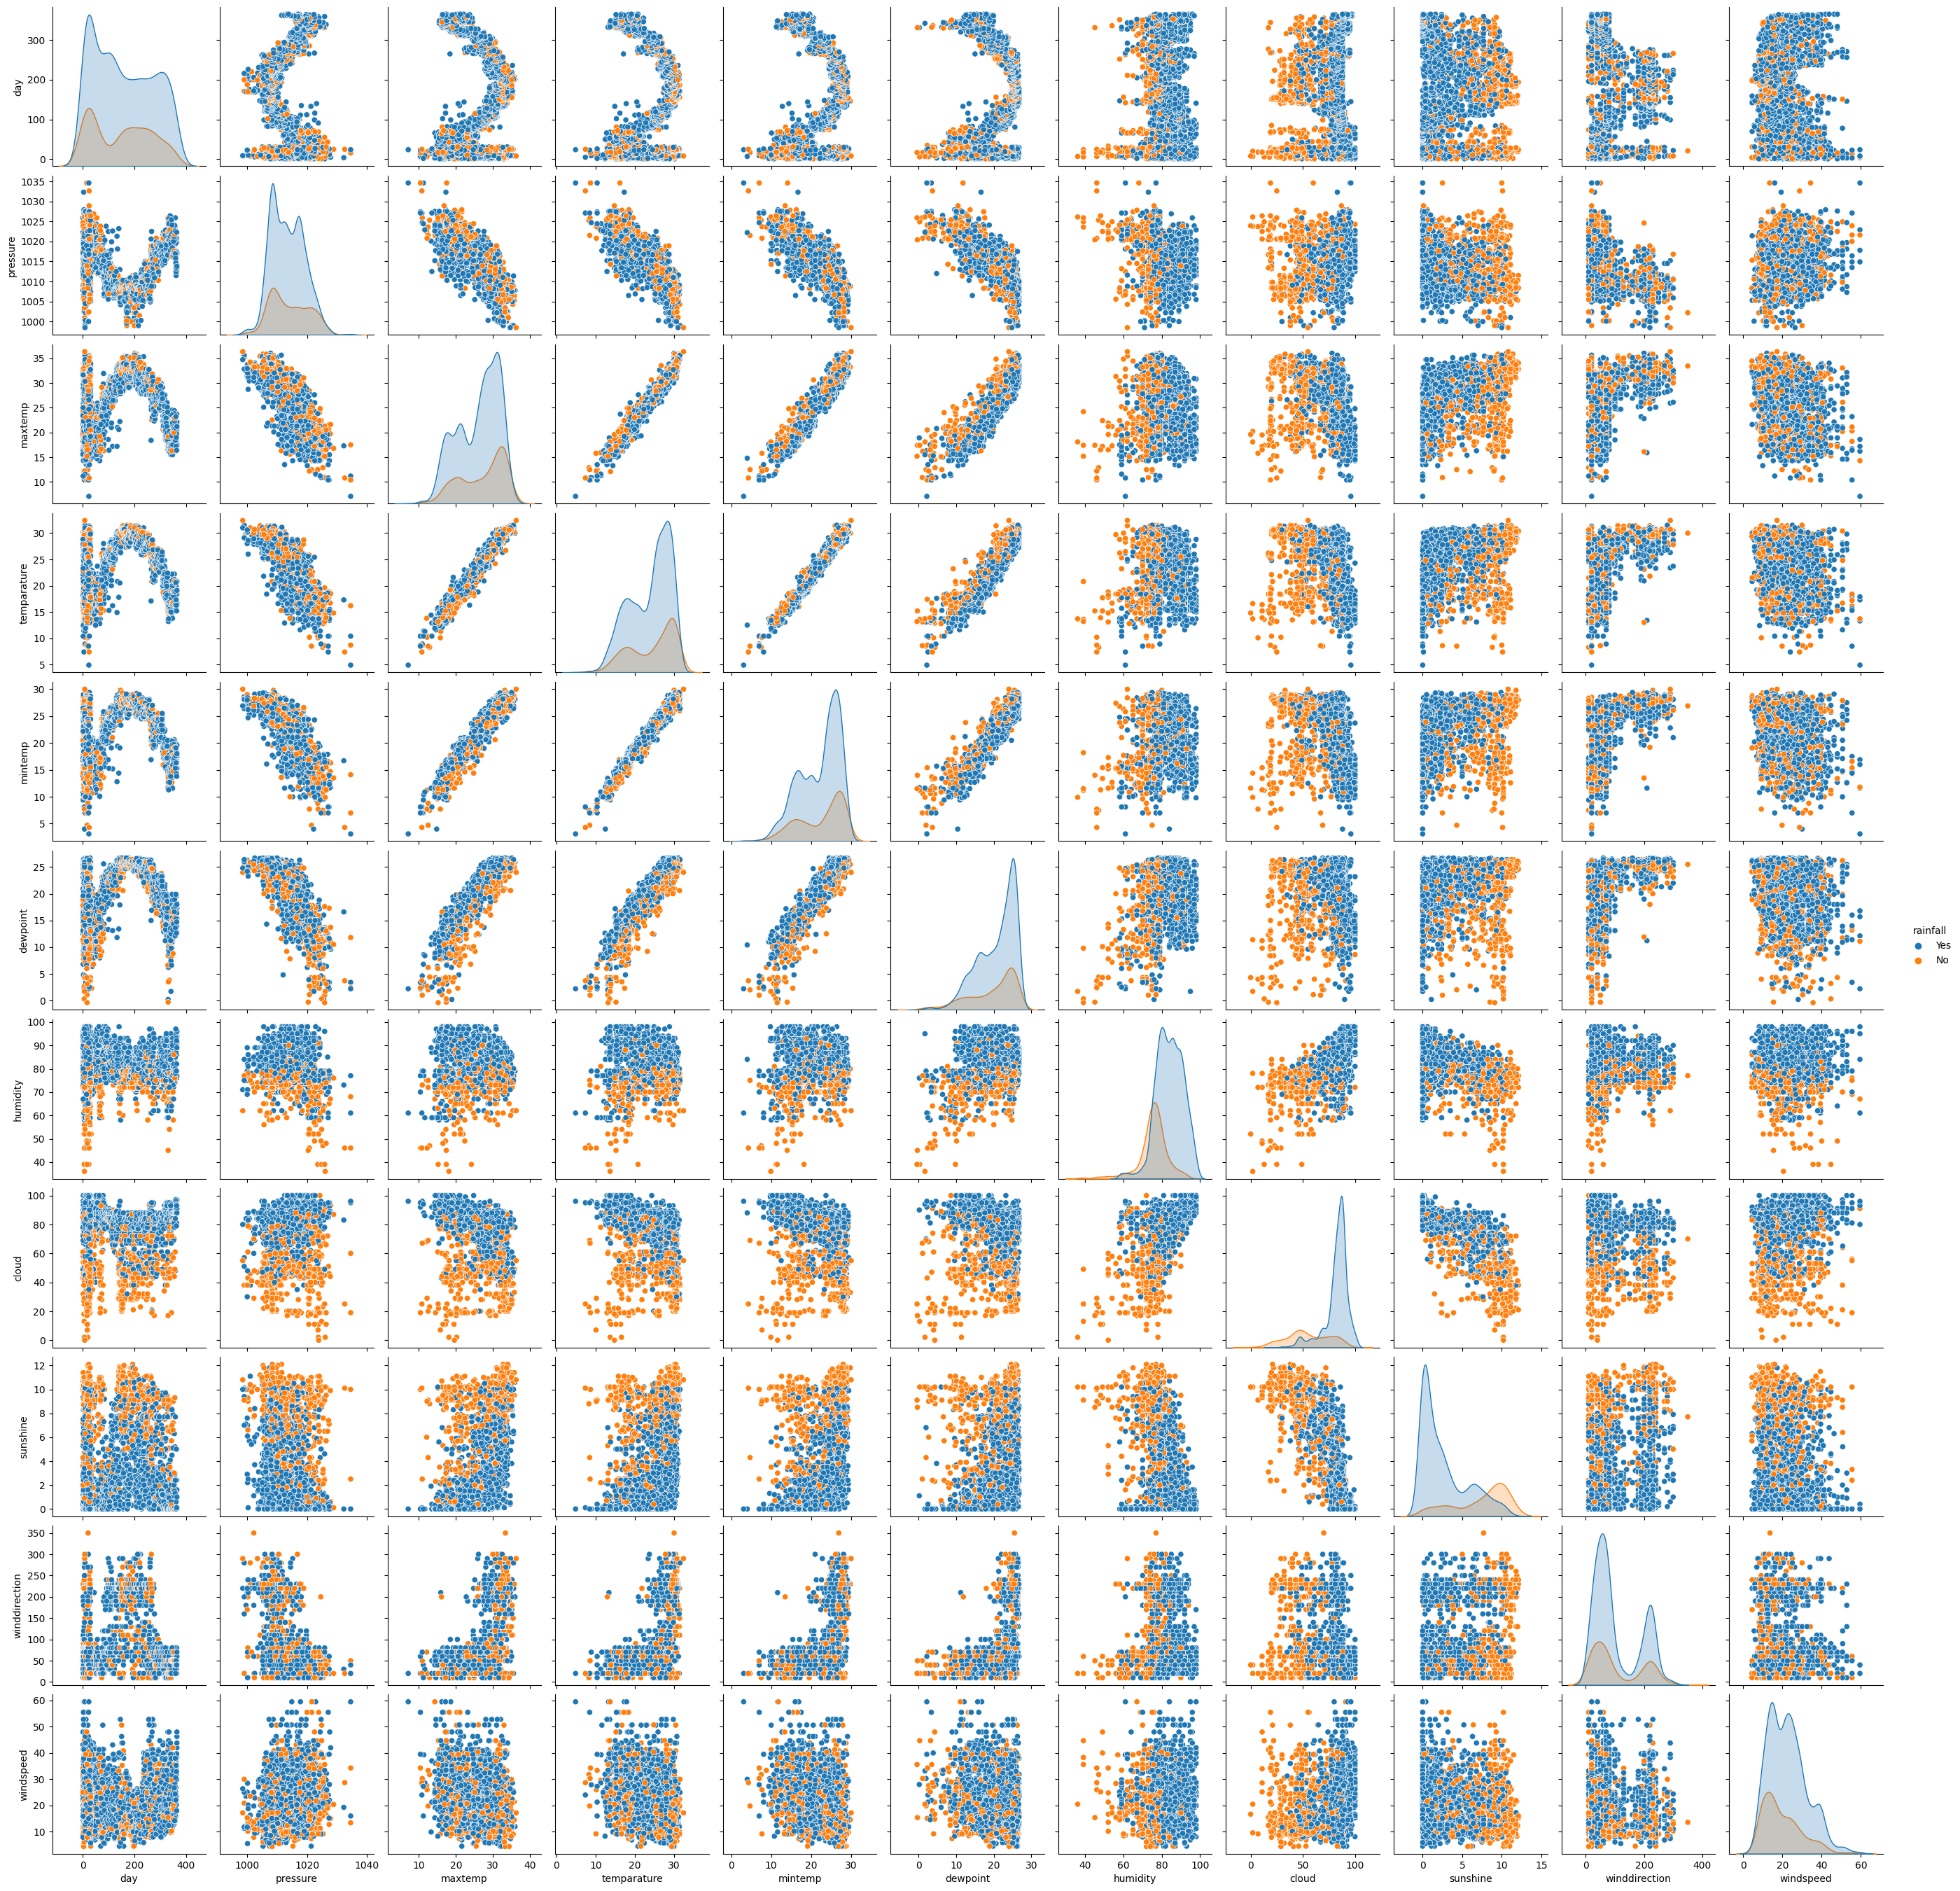

In [259]:
sns.pairplot(data = train_data, hue = 'rainfall')

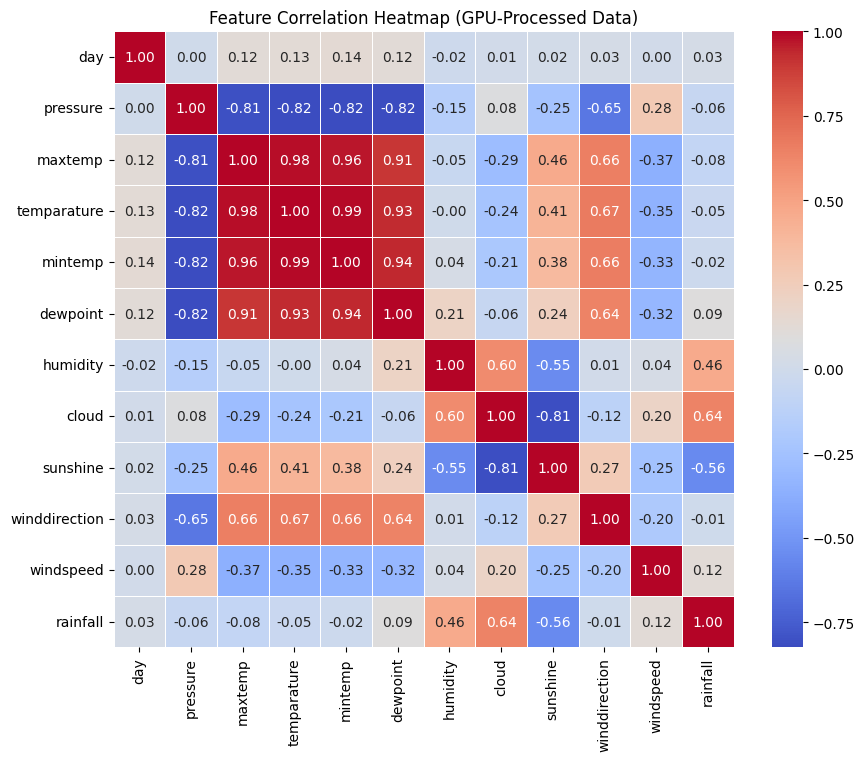

In [260]:
corr_mat = train_data.replace({'Yes' : 1, 'No' : 0}).corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_mat.values, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, xticklabels = train_data.columns, yticklabels = train_data.columns)
plt.title("Feature Correlation Heatmap (GPU-Processed Data)")
plt.show()

In [261]:
train_data.replace({'Yes' : 1, 'No' : 0}).corr()['rainfall'].sort_values(ascending = False)

rainfall         1.000000
cloud            0.639442
humidity         0.462244
windspeed        0.118574
dewpoint         0.093374
day              0.029546
winddirection   -0.007031
mintemp         -0.022508
temparature     -0.046769
pressure        -0.056975
maxtemp         -0.082004
sunshine        -0.556501
Name: rainfall, dtype: float64

### `3.2 Feature Engineering`

In [262]:
train_data.head()

day  pressure  maxtemp  temparature  mintemp  dewpoint  humidity  cloud  \
0    1    1017.4     21.2         20.6     19.9      19.4      87.0   88.0   
1    2    1019.5     16.2         16.9     15.8      15.4      95.0   91.0   
2    3    1024.1     19.4         16.1     14.6       9.3      75.0   47.0   
3    4    1013.4     18.1         17.8     16.9      16.8      95.0   95.0   
4    5    1021.8     21.3         18.4     15.2       9.6      52.0   45.0   

   sunshine  winddirection  windspeed rainfall  
0       1.1           60.0       17.2      Yes  
1       0.0           50.0       21.9      Yes  
2       8.3           70.0       18.1      Yes  
3       0.0           60.0       35.6      Yes  
4       3.6           40.0       24.8       No

In [263]:
# Features - humidity, cloud, sunshine, windspeed, dewpoint
# Interaction Features 
train_data["humidity_cloud"] = train_data["humidity"] * train_data["cloud"]
train_data['humidity_sunshine'] = train_data['humidity'] * train_data['sunshine']
train_data['humidity_windspeed'] = train_data['humidity'] * train_data['windspeed']
train_data['humidity_dewpoint'] = train_data['humidity'] * train_data['dewpoint']
train_data['cloud_sunshine'] = train_data['cloud'] * train_data['sunshine']
train_data['cloud_windspeed'] = train_data['cloud'] * train_data['windspeed']
train_data['cloud_dewpoint'] = train_data['cloud'] * train_data['dewpoint']
train_data['sunshine_dewpoint'] = train_data['sunshine'] * train_data['dewpoint']
train_data['sunshine_windspeed'] = train_data['sunshine'] * train_data['windspeed']
train_data['windspeed_dewpoint'] = train_data['windspeed'] * train_data['dewpoint']

# Ratio Features
train_data["humidity_cloud_ratio"] = train_data["humidity"] / (train_data["cloud"] + 1e-6)
train_data["humidity_sunshine_ratio"] = train_data["humidity"] / (train_data["sunshine"] + 1e-6)
train_data["humidity_windspeed_ratio"] = train_data["humidity"] / (train_data["windspeed"] + 1e-6)
train_data["humidity_dewpoint_ratio"] = train_data["humidity"] / (train_data["dewpoint"] + 1e-6)
train_data["cloud_sunshine_ratio"] = train_data["cloud"] / (train_data["sunshine"] + 1e-6)
train_data["cloud_windspeed_ratio"] = train_data["cloud"] / (train_data["windspeed"] + 1e-6)
train_data["cloud_dewpoint_ratio"] = train_data["cloud"] / (train_data["dewpoint"] + 1e-6)
train_data["sunshine_dewpoint_ratio"] = train_data["sunshine"] / (train_data["dewpoint"] + 1e-6)
train_data["sunshine_windspeed_ratio"] = train_data["sunshine"] / (train_data["windspeed"] + 1e-6)
train_data["windspeed_dewpoint_ratio"] = train_data["windspeed"] / (train_data["dewpoint"] + 1e-6)

train_data["cloud_humidity_ratio"] = train_data["cloud"] / (train_data["humidity"] + 1e-6)
train_data["sunshine_humidity_ratio"] = train_data["sunshine"] / (train_data["humidity"] + 1e-6)
train_data["windspeed_humidity_ratio"] = train_data["windspeed"] / (train_data["humidity"] + 1e-6)
train_data["dewpoint_humidity_ratio"] = train_data["dewpoint"] / (train_data["humidity"] + 1e-6)
train_data["sunshine_cloud_ratio"] = train_data["sunshine"] / (train_data["cloud"] + 1e-6)
train_data["windspeed_cloud_ratio"] = train_data["windspeed"] / (train_data["cloud"] + 1e-6)
train_data["dewpoint_cloud_ratio"] = train_data["dewpoint"] / (train_data["cloud"] + 1e-6)
train_data["dewpoint_sunshine_ratio"] = train_data["dewpoint"] / (train_data["sunshine"] + 1e-6)
train_data["windspeed_sunshine_ratio"] = train_data["windspeed"] / (train_data["sunshine"] + 1e-6)
train_data["dewpoint_windspeed_ratio"] = train_data["dewpoint"] / (train_data["windspeed"] + 1e-6)

# **Extended Lag Features**
train_data['humidity_lag1'] = train_data['humidity'].shift(1)
train_data['cloud_lag1'] = train_data['cloud'].shift(1)
train_data['sunshine_lag1'] = train_data['sunshine'].shift(1)
train_data['windspeed_lag1'] = train_data['windspeed'].shift(1)
train_data['dewpoint_lag1'] = train_data['dewpoint'].shift(1)

# **Relative Change Features**
train_data["humidity_relative_change"] = train_data["humidity"].pct_change()
train_data["cloud_relative_change"] = train_data["cloud"].pct_change()
train_data["sunshine_relative_change"] = train_data["sunshine"].pct_change()
train_data["windspeed_relative_change"] = train_data["windspeed"].pct_change()
train_data["dewpoint_relative_change"] = train_data["dewpoint"].pct_change()

In [264]:
# Interaction Features 
test_data["humidity_cloud"] = test_data["humidity"] * test_data["cloud"]
test_data['humidity_sunshine'] = test_data['humidity'] * test_data['sunshine']
test_data['humidity_windspeed'] = test_data['humidity'] * test_data['windspeed']
test_data['humidity_dewpoint'] = test_data['humidity'] * test_data['dewpoint']
test_data['cloud_sunshine'] = test_data['cloud'] * test_data['sunshine']
test_data['cloud_windspeed'] = test_data['cloud'] * test_data['windspeed']
test_data['cloud_dewpoint'] = test_data['cloud'] * test_data['dewpoint']
test_data['sunshine_dewpoint'] = test_data['sunshine'] * test_data['dewpoint']
test_data['sunshine_windspeed'] = test_data['sunshine'] * test_data['windspeed']
test_data['windspeed_dewpoint'] = test_data['windspeed'] * test_data['dewpoint']

# Ratio Features
test_data["humidity_cloud_ratio"] = test_data["humidity"] / (test_data["cloud"] + 1e-6)
test_data["humidity_sunshine_ratio"] = test_data["humidity"] / (test_data["sunshine"] + 1e-6)
test_data["humidity_windspeed_ratio"] = test_data["humidity"] / (test_data["windspeed"] + 1e-6)
test_data["humidity_dewpoint_ratio"] = test_data["humidity"] / (test_data["dewpoint"] + 1e-6)
test_data["cloud_sunshine_ratio"] = test_data["cloud"] / (test_data["sunshine"] + 1e-6)
test_data["cloud_windspeed_ratio"] = test_data["cloud"] / (test_data["windspeed"] + 1e-6)
test_data["cloud_dewpoint_ratio"] = test_data["cloud"] / (test_data["dewpoint"] + 1e-6)
test_data["sunshine_dewpoint_ratio"] = test_data["sunshine"] / (test_data["dewpoint"] + 1e-6)
test_data["sunshine_windspeed_ratio"] = test_data["sunshine"] / (test_data["windspeed"] + 1e-6)
test_data["windspeed_dewpoint_ratio"] = test_data["windspeed"] / (test_data["dewpoint"] + 1e-6)

test_data["cloud_humidity_ratio"] = test_data["cloud"] / (test_data["humidity"] + 1e-6)
test_data["sunshine_humidity_ratio"] = test_data["sunshine"] / (test_data["humidity"] + 1e-6)
test_data["windspeed_humidity_ratio"] = test_data["windspeed"] / (test_data["humidity"] + 1e-6)
test_data["dewpoint_humidity_ratio"] = test_data["dewpoint"] / (test_data["humidity"] + 1e-6)
test_data["sunshine_cloud_ratio"] = test_data["sunshine"] / (test_data["cloud"] + 1e-6)
test_data["windspeed_cloud_ratio"] = test_data["windspeed"] / (test_data["cloud"] + 1e-6)
test_data["dewpoint_cloud_ratio"] = test_data["dewpoint"] / (test_data["cloud"] + 1e-6)
test_data["dewpoint_sunshine_ratio"] = test_data["dewpoint"] / (test_data["sunshine"] + 1e-6)
test_data["windspeed_sunshine_ratio"] = test_data["windspeed"] / (test_data["sunshine"] + 1e-6)
test_data["dewpoint_windspeed_ratio"] = test_data["dewpoint"] / (test_data["windspeed"] + 1e-6)

# Extended Lag Features
test_data['humidity_lag1'] = test_data['humidity'].shift(1)
test_data['cloud_lag1'] = test_data['cloud'].shift(1)
test_data['sunshine_lag1'] = test_data['sunshine'].shift(1)
test_data['windspeed_lag1'] = test_data['windspeed'].shift(1)
test_data['dewpoint_lag1'] = test_data['dewpoint'].shift(1)

# Relative Change Features
test_data["humidity_relative_change"] = test_data["humidity"].pct_change()
test_data["cloud_relative_change"] = test_data["cloud"].pct_change()
test_data["sunshine_relative_change"] = test_data["sunshine"].pct_change()
test_data["windspeed_relative_change"] = test_data["windspeed"].pct_change()
test_data["dewpoint_relative_change"] = test_data["dewpoint"].pct_change()

In [265]:
train_data.replace([np.inf, -np.inf], np.nan, inplace=True)
test_data.replace([np.inf, -np.inf], np.nan, inplace=True)

In [266]:
train_data.rainfall = train_data['rainfall'].map({'Yes' : 1, 'No' : 0})
train_data = train_data.fillna(train_data.mean())
test_data = test_data.fillna(test_data.mean())

In [267]:
train_data.isnull().sum()

day                          0
pressure                     0
maxtemp                      0
temparature                  0
mintemp                      0
dewpoint                     0
humidity                     0
cloud                        0
sunshine                     0
winddirection                0
windspeed                    0
rainfall                     0
humidity_cloud               0
humidity_sunshine            0
humidity_windspeed           0
humidity_dewpoint            0
cloud_sunshine               0
cloud_windspeed              0
cloud_dewpoint               0
sunshine_dewpoint            0
sunshine_windspeed           0
windspeed_dewpoint           0
humidity_cloud_ratio         0
humidity_sunshine_ratio      0
humidity_windspeed_ratio     0
humidity_dewpoint_ratio      0
cloud_sunshine_ratio         0
cloud_windspeed_ratio        0
cloud_dewpoint_ratio         0
sunshine_dewpoint_ratio      0
sunshine_windspeed_ratio     0
windspeed_dewpoint_ratio     0
cloud_hu

In [268]:
test_data.isnull().sum()

id                           0
day                          0
pressure                     0
maxtemp                      0
temparature                  0
mintemp                      0
dewpoint                     0
humidity                     0
cloud                        0
sunshine                     0
winddirection                0
windspeed                    0
humidity_cloud               0
humidity_sunshine            0
humidity_windspeed           0
humidity_dewpoint            0
cloud_sunshine               0
cloud_windspeed              0
cloud_dewpoint               0
sunshine_dewpoint            0
sunshine_windspeed           0
windspeed_dewpoint           0
humidity_cloud_ratio         0
humidity_sunshine_ratio      0
humidity_windspeed_ratio     0
humidity_dewpoint_ratio      0
cloud_sunshine_ratio         0
cloud_windspeed_ratio        0
cloud_dewpoint_ratio         0
sunshine_dewpoint_ratio      0
sunshine_windspeed_ratio     0
windspeed_dewpoint_ratio     0
cloud_hu

In [269]:
train_data.head().T

0             1            2  \
day                           1.000000  2.000000e+00     3.000000   
pressure                   1017.400000  1.019500e+03  1024.100000   
maxtemp                      21.200000  1.620000e+01    19.400000   
temparature                  20.600000  1.690000e+01    16.100000   
mintemp                      19.900000  1.580000e+01    14.600000   
dewpoint                     19.400000  1.540000e+01     9.300000   
humidity                     87.000000  9.500000e+01    75.000000   
cloud                        88.000000  9.100000e+01    47.000000   
sunshine                      1.100000  0.000000e+00     8.300000   
winddirection                60.000000  5.000000e+01    70.000000   
windspeed                    17.200000  2.190000e+01    18.100000   
rainfall                      1.000000  1.000000e+00     1.000000   
humidity_cloud             7656.000000  8.645000e+03  3525.000000   
humidity_sunshine            95.700000  0.000000e+00   622.500000   
humidity_windspeed         1496.400000  2.080500e+03  1357.500000   
humidity_dewpoint          1687.800000  1.463000e+03   697.500000   
cloud_sunshine               96.800000  0.000000e+00   390.100000   
cloud_windspeed            1513.600000  1.992900e+03   850.700000   
cloud_dewpoint             1707.200000  1.401400e+03   437.100000   
sunshine_dewpoint            21.340000  0.000000e+00    77.190000   
sunshine_windspeed           18.920000  0.000000e+00   150.230000   
windspeed_dewpoint          333.680000  3.372600e+02   168.330000   
humidity_cloud_ratio          0.988636  1.043956e+00     1.595745   
humidity_sunshine_ratio      79.090837  9.500000e+07     9.036143   
humidity_windspeed_ratio      5.058139  4.337899e+00     4.143646   
humidity_dewpoint_ratio       4.484536  6.168831e+00     8.064515   
cloud_sunshine_ratio         79.999927  9.100000e+07     5.662650   
cloud_windspeed_ratio         5.116279  4.155251e+00     2.596685   
cloud_dewpoint_ratio          4.536082  5.909091e+00     5.053763   
sunshine_dewpoint_ratio       0.056701  0.000000e+00     0.892473   
sunshine_windspeed_ratio      0.063953  0.000000e+00     0.458564   
windspeed_dewpoint_ratio      0.886598  1.422078e+00     1.946236   
cloud_humidity_ratio          1.011494  9.578947e-01     0.626667   
sunshine_humidity_ratio       0.012644  0.000000e+00     0.110667   
windspeed_humidity_ratio      0.197701  2.305263e-01     0.241333   
dewpoint_humidity_ratio       0.222989  1.621053e-01     0.124000   
sunshine_cloud_ratio          0.012500  0.000000e+00     0.176596   
windspeed_cloud_ratio         0.195455  2.406593e-01     0.385106   
dewpoint_cloud_ratio          0.220455  1.692308e-01     0.197872   
dewpoint_sunshine_ratio      17.636348  1.540000e+07     1.120482   
windspeed_sunshine_ratio     15.636349  2.190000e+07     2.180723   
dewpoint_windspeed_ratio      1.127907  7.031963e-01     0.513812   
humidity_lag1                81.773386  8.700000e+01    95.000000   
cloud_lag1                   75.067710  8.800000e+01    91.000000   
sunshine_lag1                 3.840352  1.100000e+00     0.000000   
windspeed_lag1               21.765858  1.720000e+01    21.900000   
dewpoint_lag1                20.390802  1.940000e+01    15.400000   
humidity_relative_change      0.007727  9.195402e-02    -0.210526   
cloud_relative_change         0.098239  3.409091e-02    -0.483516   
sunshine_relative_change      1.836312 -1.000000e+00     1.836312   
windspeed_relative_change     0.177532  2.732558e-01    -0.173516   
dewpoint_relative_change      0.067977 -2.061856e-01    -0.396104   

                                      3            4  
day                        4.000000e+00     5.000000  
pressure                   1.013400e+03  1021.800000  
maxtemp                    1.810000e+01    21.300000  
temparature                1.780000e+01    18.400000  
mintemp                    1.690000e+01    15.200000  
dewpoint                   1.680000e+01     9.600

In [270]:
test_data.head().T

0             1             2  \
id                         2.190000e+03  2.191000e+03  2.192000e+03   
day                        1.000000e+00  2.000000e+00  3.000000e+00   
pressure                   1.019500e+03  1.016500e+03  1.023900e+03   
maxtemp                    1.750000e+01  1.750000e+01  1.120000e+01   
temparature                1.580000e+01  1.650000e+01  1.040000e+01   
mintemp                    1.270000e+01  1.580000e+01  9.400000e+00   
dewpoint                   1.490000e+01  1.510000e+01  8.900000e+00   
humidity                   9.600000e+01  9.700000e+01  8.600000e+01   
cloud                      9.900000e+01  9.900000e+01  9.600000e+01   
sunshine                   0.000000e+00  0.000000e+00  0.000000e+00   
winddirection              5.000000e+01  5.000000e+01  4.000000e+01   
windspeed                  2.430000e+01  3.530000e+01  1.690000e+01   
humidity_cloud             9.504000e+03  9.603000e+03  8.256000e+03   
humidity_sunshine          0.000000e+00  0.000000e+00  0.000000e+00   
humidity_windspeed         2.332800e+03  3.424100e+03  1.453400e+03   
humidity_dewpoint          1.430400e+03  1.464700e+03  7.654000e+02   
cloud_sunshine             0.000000e+00  0.000000e+00  0.000000e+00   
cloud_windspeed            2.405700e+03  3.494700e+03  1.622400e+03   
cloud_dewpoint             1.475100e+03  1.494900e+03  8.544000e+02   
sunshine_dewpoint          0.000000e+00  0.000000e+00  0.000000e+00   
sunshine_windspeed         0.000000e+00  0.000000e+00  0.000000e+00   
windspeed_dewpoint         3.620700e+02  5.330300e+02  1.504100e+02   
humidity_cloud_ratio       9.696970e-01  9.797980e-01  8.958333e-01   
humidity_sunshine_ratio    9.600000e+07  9.700000e+07  8.600000e+07   
humidity_windspeed_ratio   3.950617e+00  2.747875e+00  5.088757e+00   
humidity_dewpoint_ratio    6.442953e+00  6.423841e+00  9.662920e+00   
cloud_sunshine_ratio       9.900000e+07  9.900000e+07  9.600000e+07   
cloud_windspeed_ratio      4.074074e+00  2.804532e+00  5.680473e+00   
cloud_dewpoint_ratio       6.644295e+00  6.556291e+00  1.078652e+01   
sunshine_dewpoint_ratio    0.000000e+00  0.000000e+00  0.000000e+00   
sunshine_windspeed_ratio   0.000000e+00  0.000000e+00  0.000000e+00   
windspeed_dewpoint_ratio   1.630872e+00  2.337748e+00  1.898876e+00   
cloud_humidity_ratio       1.031250e+00  1.020619e+00  1.116279e+00   
sunshine_humidity_ratio    0.000000e+00  0.000000e+00  0.000000e+00   
windspeed_humidity_ratio   2.531250e-01  3.639175e-01  1.965116e-01   
dewpoint_humidity_ratio    1.552083e-01  1.556701e-01  1.034884e-01   
sunshine_cloud_ratio       0.000000e+00  0.000000e+00  0.000000e+00   
windspeed_cloud_ratio      2.454545e-01  3.565657e-01  1.760417e-01   
dewpoint_cloud_ratio       1.505050e-01  1.525253e-01  9.270833e-02   
dewpoint_sunshine_ratio    1.490000e+07  1.510000e+07  8.900000e+06   
windspeed_sunshine_ratio   2.430000e+07  3.530000e+07  1.690000e+07   
dewpoint_windspeed_ratio   6.131687e-01  4.277620e-01  5.266272e-01   
humidity_lag1              8.267490e+01  9.600000e+01  9.700000e+01   
cloud_lag1                 7.634294e+01  9.900000e+01  9.900000e+01   
sunshine_lag1              3.669136e+00  0.000000e+00  0.000000e+00   
windspeed_lag1             2.244568e+01  2.430000e+01  3.530000e+01   
dewpoint_lag1              2.046996e+01  1.490000e+01  1.510000e+01   
humidity_relative_change   7.713950e-03  1.041667e-02 -1.134021e-01   
cloud_relative_change      7.758399e-02  0.000000e+00 -3.030303e-02   
sunshine_relative_change   2.182076e+00  2.182076e+00  2.182076e+00   
windspeed_relative_change  1.799430e-01  4.526749e-01 -5.212465e-01   
dewpoint_relative_change   4.707877e-02  1.342282e-02 -4.105960e-01   

                                     3            4  
id                         2193.000000  2194.000000  
day                           4.000000     5.000000  
pressure                   1022.900000  1022.200000  
maxtemp                      20.600000    16.100000  
temp

## `OverSampling Dataset`

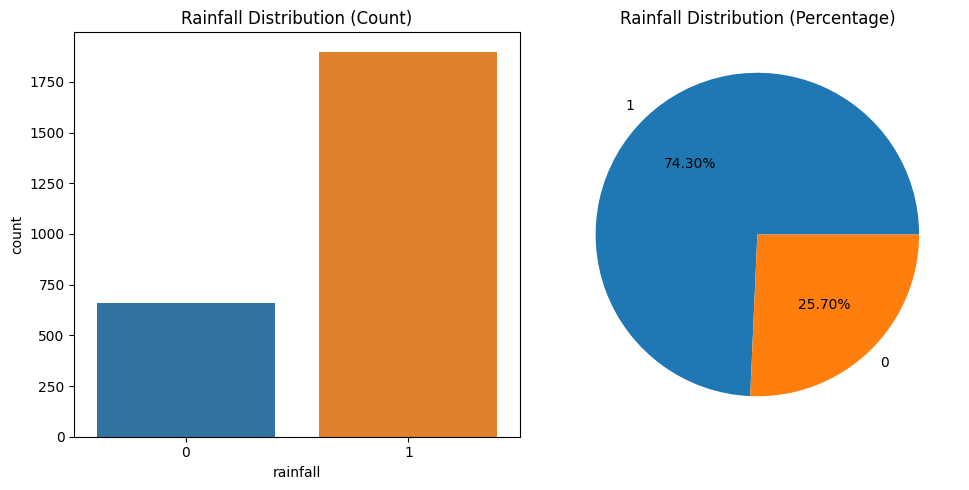

In [271]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

sns.countplot(data=train_data, x='rainfall', ax=ax[0])
ax[0].set_title("Rainfall Distribution (Count)")

rainfall_counts = train_data['rainfall'].value_counts()
ax[1].pie(x=rainfall_counts, labels=rainfall_counts.index, autopct='%.2f%%')
ax[1].set_title("Rainfall Distribution (Percentage)")

plt.tight_layout()
plt.show()

In [272]:
X = train_data.drop(columns=['rainfall']) 
y = train_data['rainfall']

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

train_data_resampled = X_resampled.copy()
train_data_resampled['rainfall'] = y_resampled

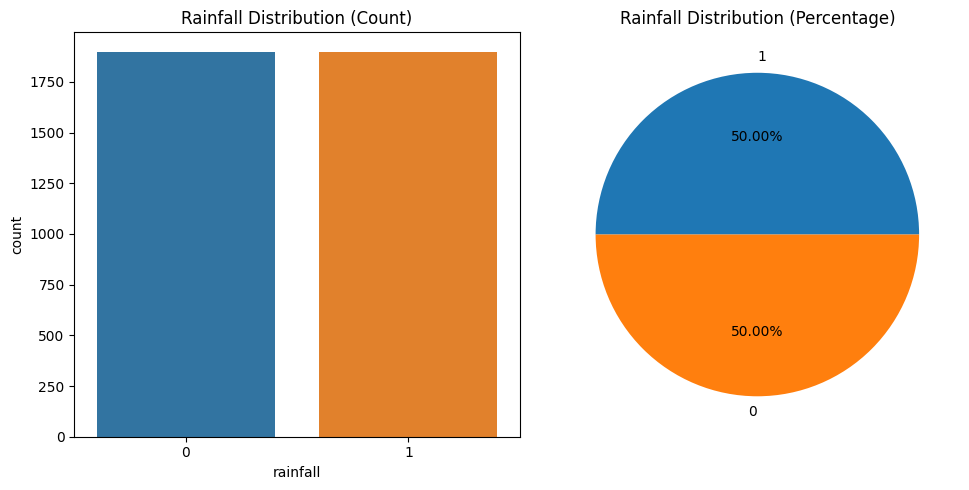

In [273]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

sns.countplot(data=train_data_resampled, x='rainfall', ax=ax[0])
ax[0].set_title("Rainfall Distribution (Count)")

rainfall_counts = train_data_resampled['rainfall'].value_counts()
ax[1].pie(x=rainfall_counts, labels=rainfall_counts.index, autopct='%.2f%%')
ax[1].set_title("Rainfall Distribution (Percentage)")

plt.tight_layout()
plt.show()

## `Feature Selection`

In [274]:
train_data_resampled.corr()['rainfall']

day                          0.050237
pressure                    -0.047232
maxtemp                     -0.104210
temparature                 -0.059953
mintemp                     -0.030949
dewpoint                     0.096467
humidity                     0.515584
cloud                        0.638969
sunshine                    -0.612230
winddirection               -0.023015
windspeed                    0.154339
humidity_cloud               0.662320
humidity_sunshine           -0.584221
humidity_windspeed           0.268220
humidity_dewpoint            0.246564
cloud_sunshine              -0.416071
cloud_windspeed              0.433753
cloud_dewpoint               0.545277
sunshine_dewpoint           -0.493286
sunshine_windspeed          -0.475145
windspeed_dewpoint           0.219475
humidity_cloud_ratio        -0.027148
humidity_sunshine_ratio      0.288724
humidity_windspeed_ratio    -0.067005
humidity_dewpoint_ratio      0.005514
cloud_sunshine_ratio         0.285613
cloud_windsp

In [275]:
train_data_resampled.corr()['rainfall'][(train_data_resampled.corr()['rainfall'] > 0.15) | (train_data_resampled.corr()['rainfall'] < -0.15)]

humidity                    0.515584
cloud                       0.638969
sunshine                   -0.612230
windspeed                   0.154339
humidity_cloud              0.662320
humidity_sunshine          -0.584221
humidity_windspeed          0.268220
humidity_dewpoint           0.246564
cloud_sunshine             -0.416071
cloud_windspeed             0.433753
cloud_dewpoint              0.545277
sunshine_dewpoint          -0.493286
sunshine_windspeed         -0.475145
windspeed_dewpoint          0.219475
humidity_sunshine_ratio     0.288724
cloud_sunshine_ratio        0.285613
cloud_windspeed_ratio       0.222016
sunshine_windspeed_ratio   -0.498966
cloud_humidity_ratio        0.546279
sunshine_humidity_ratio    -0.622214
dewpoint_sunshine_ratio     0.284277
windspeed_sunshine_ratio    0.264721
humidity_lag1               0.194929
cloud_lag1                  0.251025
sunshine_lag1              -0.240838
humidity_relative_change    0.283737
rainfall                    1.000000
N

In [276]:
selected_cols = list(train_data_resampled.corr()['rainfall'][(train_data_resampled.corr()['rainfall'] > 0.15) | (train_data_resampled.corr()['rainfall'] < -0.15)].index)
selected_cols

['humidity',
 'cloud',
 'sunshine',
 'windspeed',
 'humidity_cloud',
 'humidity_sunshine',
 'humidity_windspeed',
 'humidity_dewpoint',
 'cloud_sunshine',
 'cloud_windspeed',
 'cloud_dewpoint',
 'sunshine_dewpoint',
 'sunshine_windspeed',
 'windspeed_dewpoint',
 'humidity_sunshine_ratio',
 'cloud_sunshine_ratio',
 'cloud_windspeed_ratio',
 'sunshine_windspeed_ratio',
 'cloud_humidity_ratio',
 'sunshine_humidity_ratio',
 'dewpoint_sunshine_ratio',
 'windspeed_sunshine_ratio',
 'humidity_lag1',
 'cloud_lag1',
 'sunshine_lag1',
 'humidity_relative_change',
 'rainfall']

In [277]:
selected_train_data = train_data_resampled[selected_cols]
selected_cols.remove('rainfall')
selected_cols.append('id')
selected_test_data = test_data[selected_cols]

In [278]:
selected_train_data.head()

humidity  cloud  sunshine  windspeed  humidity_cloud  humidity_sunshine  \
0      87.0   88.0       1.1       17.2          7656.0               95.7   
1      95.0   91.0       0.0       21.9          8645.0                0.0   
2      75.0   47.0       8.3       18.1          3525.0              622.5   
3      95.0   95.0       0.0       35.6          9025.0                0.0   
4      52.0   45.0       3.6       24.8          2340.0              187.2   

   humidity_windspeed  humidity_dewpoint  cloud_sunshine  cloud_windspeed  \
0              1496.4             1687.8            96.8           1513.6   
1              2080.5             1463.0             0.0           1992.9   
2              1357.5              697.5           390.1            850.7   
3              3382.0             1596.0             0.0           3382.0   
4              1289.6              499.2           162.0           1116.0   

   ...  sunshine_windspeed_ratio  cloud_humidity_ratio  \
0  ...                  0.063953              1.011494   
1  ...                  0.000000              0.957895   
2  ...                  0.458564              0.626667   
3  ...                  0.000000              1.000000   
4  ...                  0.145161              0.865385   

   sunshine_humidity_ratio  dewpoint_sunshine_ratio  windspeed_sunshine_ratio  \
0                 0.012644             1.763635e+01              1.563635e+01   
1                 0.000000             1.540000e+07              2.190000e+07   
2                 0.110667             1.120482e+00              2.180723e+00   
3                 0.000000             1.680000e+07              3.560000e+07   
4                 0.069231             2.666666e+00              6.888887e+00   

   humidity_lag1  cloud_lag1  sunshine_lag1  humidity_relative_change  \
0      81.773386    75.06771       3.840352                  0.007727   
1      87.000000    88.00000       1.100000                  0.091954   
2      95.000000    91.00000       0.000000                 -0.210526   
3      75.000000    47.00000       8.300000                  0.266667   
4      95.000000    95.00000       0.000000                 -0.452632   

   rainfall  
0         1  
1         1  
2         1  
3         1  
4         0  

[5 rows x 27 columns]

In [279]:
selected_test_data.head()

humidity  cloud  sunshine  windspeed  humidity_cloud  humidity_sunshine  \
0      96.0   99.0       0.0       24.3          9504.0                0.0   
1      97.0   99.0       0.0       35.3          9603.0                0.0   
2      86.0   96.0       0.0       16.9          8256.0                0.0   
3      75.0   45.0       7.1       50.6          3375.0              532.5   
4      68.0   49.0       9.2       19.4          3332.0              625.6   

   humidity_windspeed  humidity_dewpoint  cloud_sunshine  cloud_windspeed  \
0              2332.8             1430.4             0.0           2405.7   
1              3424.1             1464.7             0.0           3494.7   
2              1453.4              765.4             0.0           1622.4   
3              3795.0              712.5           319.5           2277.0   
4              1319.2              292.4           450.8            950.6   

   ...  sunshine_windspeed_ratio  cloud_humidity_ratio  \
0  ...                  0.000000              1.031250   
1  ...                  0.000000              1.020619   
2  ...                  0.000000              1.116279   
3  ...                  0.140316              0.600000   
4  ...                  0.474227              0.720588   

   sunshine_humidity_ratio  dewpoint_sunshine_ratio  windspeed_sunshine_ratio  \
0                 0.000000             1.490000e+07              2.430000e+07   
1                 0.000000             1.510000e+07              3.530000e+07   
2                 0.000000             8.900000e+06              1.690000e+07   
3                 0.094667             1.338028e+00              7.126760e+00   
4                 0.135294             4.673913e-01              2.108695e+00   

   humidity_lag1  cloud_lag1  sunshine_lag1  humidity_relative_change    id  
0      82.674897   76.342936       3.669136                  0.007714  2190  
1      96.000000   99.000000       0.000000                  0.010417  2191  
2      97.000000   99.000000       0.000000                 -0.113402  2192  
3      86.000000   96.000000       0.000000                 -0.127907  2193  
4      75.000000   45.000000       7.100000                 -0.093333  2194  

[5 rows x 27 columns]

In [280]:
print(selected_train_data.shape)
print(selected_test_data.shape)

(3798, 27)
(730, 27)


## `Standardization of Dataset`

In [281]:
selected_train_data.dtypes.unique()

array([dtype('float64'), dtype('int64')], dtype=object)

In [282]:
selected_train_data.columns

Index(['humidity', 'cloud', 'sunshine', 'windspeed', 'humidity_cloud',
       'humidity_sunshine', 'humidity_windspeed', 'humidity_dewpoint',
       'cloud_sunshine', 'cloud_windspeed', 'cloud_dewpoint',
       'sunshine_dewpoint', 'sunshine_windspeed', 'windspeed_dewpoint',
       'humidity_sunshine_ratio', 'cloud_sunshine_ratio',
       'cloud_windspeed_ratio', 'sunshine_windspeed_ratio',
       'cloud_humidity_ratio', 'sunshine_humidity_ratio',
       'dewpoint_sunshine_ratio', 'windspeed_sunshine_ratio', 'humidity_lag1',
       'cloud_lag1', 'sunshine_lag1', 'humidity_relative_change', 'rainfall'],
      dtype='object')

In [288]:
ss = StandardScaler()

columns = list(selected_train_data.columns)
columns.remove('rainfall')

selected_train_data[columns] = ss.fit_transform(selected_train_data[columns])
selected_test_data[columns] = ss.transform(selected_test_data[columns])

In [290]:
selected_train_data.head()

humidity     cloud  sunshine  windspeed  humidity_cloud  humidity_sunshine  \
0  0.870985  0.912632 -1.003964  -0.382252        1.010351          -0.986548   
1  1.817393  1.051499 -1.284297   0.097379        1.485834          -1.315856   
2 -0.548626 -0.985215  0.830944  -0.290408       -0.975717           0.826193   
3  1.817393  1.236655 -1.284297   1.495451        1.668527          -1.315856   
4 -3.269549 -1.077793 -0.366843   0.393321       -1.545431          -0.671693   

   humidity_windspeed  humidity_dewpoint  cloud_sunshine  cloud_windspeed  \
0           -0.213362           0.141768       -0.886478         0.043529   
1            0.503322          -0.312228       -1.370092         0.570074   
2           -0.383791          -1.858200        0.578853        -0.684713   
3            2.100248          -0.043627       -1.370092         2.096099   
4           -0.467104          -2.258678       -0.560738        -0.393263   

   ...  sunshine_windspeed_ratio  cloud_humidity_ratio  \
0  ...                 -0.781510              0.681022   
1  ...                 -0.966079              0.457003   
2  ...                  0.357331             -0.927365   
3  ...                 -0.966079              0.632982   
4  ...                 -0.547145              0.070357   

   sunshine_humidity_ratio  dewpoint_sunshine_ratio  windspeed_sunshine_ratio  \
0                -0.988878                -0.337092                 -0.328773   
1                -1.217880                 2.765141                  1.952100   
2                 0.786510                -0.337096                 -0.328775   
3                -1.217880                 3.047162                  3.378949   
4                 0.036025                -0.337095                 -0.328774   

   humidity_lag1  cloud_lag1  sunshine_lag1  humidity_relative_change  \
0       0.091913    0.119612      -0.118052                  0.142874   
1       0.757966    0.807368      -0.876306                  0.826757   
2       1.777446    0.966911      -1.180676                 -1.629237   
3      -0.771253   -1.373064       1.115932                  2.245339   
4       1.777446    1.179636      -1.180676                 -3.595014   

   rainfall  
0         1  
1         1  
2         1  
3         1  
4         0  

[5 rows x 27 columns]

In [291]:
selected_test_data.head()

humidity     cloud  sunshine  windspeed  humidity_cloud  humidity_sunshine  \
0  1.935694  1.421811 -1.284297   0.342296        1.898817          -1.315856   
1  2.053995  1.421811 -1.284297   1.464837        1.946413          -1.315856   
2  0.752684  1.282944 -1.284297  -0.412867        1.298814          -1.315856   
3 -0.548626 -1.077793  0.525126   3.026188       -1.047833           0.516499   
4 -1.376733 -0.892637  1.060308  -0.157744       -1.068506           0.836860   

   humidity_windspeed  humidity_dewpoint  cloud_sunshine  cloud_windspeed  \
0            0.812891          -0.378066       -1.370092         1.023564   
1            2.151904          -0.308795       -1.370092         2.219908   
2           -0.266123          -1.721072       -1.370092         0.163054   
3            2.606994          -1.827906        0.226134         0.882178   
4           -0.430785          -2.676322        0.882111        -0.574966   

   ...  sunshine_windspeed_ratio  cloud_humidity_ratio  \
0  ...                 -0.966079              0.763591   
1  ...                 -0.966079              0.719157   
2  ...                 -0.966079              1.118970   
3  ...                 -0.561128             -1.038818   
4  ...                  0.402535             -0.534820   

   sunshine_humidity_ratio  dewpoint_sunshine_ratio  windspeed_sunshine_ratio  \
0                -1.217880                 2.664419                  2.202059   
1                -1.217880                 2.704707                  3.347704   
2                -1.217880                 1.455755                  1.431353   
3                 0.496719                -0.337095                 -0.328774   
4                 1.232562                -0.337096                 -0.328775   

   humidity_lag1  cloud_lag1  sunshine_lag1  humidity_relative_change    id  
0       0.206797    0.187430      -0.165427                  0.142768  2190  
1       1.904881    1.392361      -1.180676                  0.164713  2191  
2       2.032316    1.392361      -1.180676                 -0.840635  2192  
3       0.630531    1.232818      -1.180676                 -0.958408  2193  
4      -0.771253   -1.479426       0.783892                 -0.677687  2194  

[5 rows x 27 columns]

## 4. `Saving Processed Dataset` 

In [292]:
selected_train_data.to_csv('./train_data.csv', index = False)
selected_test_data.to_csv('./test_data.csv', index = False)